# **Import des library**

In [64]:
#Manipulation et analyse de données
import pandas as pd
#Opérations numériques
import numpy as np
#Visualisation graphiques
import matplotlib.pyplot as plt

#Préparation des données avant clustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# **Import du jeu de donnée**

In [65]:
#Import du jeu de données sur le drive
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', sep=';')
#Visualisation des 5 premières lignes du jeu de données
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15565701,698.0,Spain,Female,39,9,161993.89,1.0,0.0,0,90212.38,0
1,15565706,612.0,Spain,Male,35,1,0.0,1.0,1.0,1,83256.26,1
2,15565714,601.0,France,Male,47,1,64430.06,2.0,0.0,1,96517.97,0
3,15565779,627.0,Germany,Female,30,6,57809.32,1.0,1.0,0,188258.49,0
4,15565796,745.0,Germany,Male,48,10,96048.55,1.0,1.0,0,74510.65,0


In [66]:
#Dimensions du df
df.shape

(8008, 12)

# **Nettoyage de données**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8008 entries, 0 to 8007
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       8008 non-null   int64  
 1   credit_score      8000 non-null   float64
 2   country           8000 non-null   object 
 3   gender            7999 non-null   object 
 4   age               7999 non-null   object 
 5   tenure            8008 non-null   int64  
 6   balance           7998 non-null   object 
 7   products_number   8002 non-null   float64
 8   credit_card       8000 non-null   float64
 9   active_member     8008 non-null   int64  
 10  estimated_salary  7993 non-null   object 
 11  churn             8008 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 750.9+ KB


In [68]:
#Changement nécessaire du type de certaines variables
df['balance'] = df['balance'].str.replace(',', '').astype('float64')
df['estimated_salary'] = df['estimated_salary'].str.replace(',', '').astype('float64')
df['customer_id']=df['customer_id'].astype('object')

#On modifiera le type pour la variable age plus tard car elle contient une valeur avec du texte, ainsi on doit d'abord supprimer cette valeur pour ensuite modifier le type de donnée
df.dtypes

customer_id          object
credit_score        float64
country              object
gender               object
age                  object
tenure                int64
balance             float64
products_number     float64
credit_card         float64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

## **Suppression des doublons**

In [69]:
# Identification des doublons
lignes_dupliquees = df.duplicated()
print(df.duplicated().sum())

# Filtre pour afficher les lignes dupliquées
df_dupliquees = df[lignes_dupliquees]
df_dupliquees

8


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
964,15596013,694.0,Germany,Female,58,1,143212.22,1.0,0.0,0,102628.56,1
995,15596863,787.0,Germany,Female,38,3,158373.23,1.0,1.0,1,28228.35,0
2239,15636069,632.0,Spain,Male,28,7,155519.59,1.0,1.0,0,1843.24,0
2674,15649668,637.0,Germany,Female,36,10,145750.45,2.0,1.0,1,96660.76,0
3289,15668893,782.0,France,Male,39,8,0.00,2.0,1.0,1,33949.67,0
4347,15701555,575.0,Spain,Male,53,1,84903.33,2.0,0.0,1,26015.80,0
6481,15768451,739.0,Germany,Male,40,5,149131.03,3.0,1.0,1,60036.99,1
7170,15790247,536.0,Spain,Male,40,9,0.00,2.0,1.0,1,11959.03,0


In [70]:
# Suppression des lignes dupliquées
df = df.drop_duplicates().reset_index(drop=True)

# Vérification des dimensions
df.shape

(8000, 12)

## **Gestion des null**

In [71]:
# Nb de null par variables
df.isnull().sum()

customer_id          0
credit_score         8
country              8
gender               9
age                  9
tenure               0
balance             10
products_number      6
credit_card          8
active_member        0
estimated_salary    15
churn                0
dtype: int64

In [72]:
# On supprime les lignes vides pour les booléen
df = df.loc[df['credit_card']==df['credit_card']]
df = df.loc[df['active_member']==df['active_member']]
df = df.loc[df['churn']==df['churn']]

In [73]:
# Identifier les lignes avec des valeurs manquantes dans les variables quantitatives et qualitatives
lignes_quantitatives_manquantes = df.isnull().any(axis=1)
lignes_qualitatives_manquantes = df.select_dtypes(exclude=['number']).isnull().any(axis=1)

# Imputer les valeurs manquantes dans les variables quantitatives par la moyenne
for col in df.select_dtypes(include=['number']):
    df[col] = df[col].fillna(df[col].mean())

# Supprimer les lignes où les variables qualitatives sont manquantes
df = df[~lignes_qualitatives_manquantes]

# Afficher les premières lignes du DataFrame après imputation et suppression
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15565701,698.0,Spain,Female,39,9,161993.89,1.0,0.0,0,90212.38,0
1,15565706,612.0,Spain,Male,35,1,0.00,1.0,1.0,1,83256.26,1
2,15565714,601.0,France,Male,47,1,64430.06,2.0,0.0,1,96517.97,0
3,15565779,627.0,Germany,Female,30,6,57809.32,1.0,1.0,0,188258.49,0
4,15565796,745.0,Germany,Male,48,10,96048.55,1.0,1.0,0,74510.65,0


In [74]:
#Vérification
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [75]:
# Vérif dimensions
df.shape

(7967, 12)

## **Gestion des erreurs de syntaxte**

In [76]:
# On vérifie les valeurs uniques de certaines variables ce qui permet de voir s'il y a des erreurs de syntaxte
for col in ['country','gender','age','credit_card']:
    print(f'les valeurs unique dans la colonne {col} sont :',df[col].unique())

les valeurs unique dans la colonne country sont : ['Spain' 'France' 'Germany' 'Fraance']
les valeurs unique dans la colonne gender sont : ['Female' 'Male' 'Femalee' 'mmale']
les valeurs unique dans la colonne age sont : ['39' '35' '47' '30' '48' '29' '28' '44' '32' '37' '25' '36' '33' '24'
 '23' '55' '41' '66' '45' '51' '46' '34' '40' '38' '31' '42' '73' '75'
 '27' '54' '49' '53' '20' '22' '64' '18' '57' '43' '58' '50' '65' '72'
 '61' '21' '56' '62' '71' '59' '26' '60' '52' '74' '77' '76' '69' '63'
 '68' '67' '19' '70' '83' '79' '78' '84' '80' '92' '81' '450' '82' 'a42'
 '88']
les valeurs unique dans la colonne credit_card sont : [0. 1.]


*   Age : nAn, 450 et a42
*   Country : France et Fraance
*   Gender : alien, nan, femalee, mmale

In [77]:
# Recoder les erreurs de syntaxe
df['country'].replace('Fraance', 'France', inplace=True)
df['gender'].replace('Femalee', 'Female', inplace=True)
df['gender'].replace('mmale', 'Male', inplace=True)
df['age'].replace('a42', '42', inplace=True)

In [78]:
#Suppression de la ligne avec alien dans gender
df = df[df['gender'] != 'alien']

In [79]:
#On peut maintenant convertir la variable "age" en integer car on a supprimé les nAn et les valeurs où il y avait du texte
df['age']=df['age'].astype('int64')

## **Gestion des outliers**

In [80]:
#Stat desc
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,7967.000000,7967.000000,7967.000000,7.967000e+03,7967.000000,7967.000000,7967.000000,7.967000e+03,7967.000000
mean,650.622222,38.910882,5.032509,7.790129e+04,1.531214,0.706539,0.514372,1.015639e+05,0.205222
std,96.664628,11.427559,2.899102,1.422203e+05,0.583316,0.455376,0.499825,1.270549e+05,0.403889
min,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,9.007000e+01,0.000000
25%,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.000000,0.000000,5.101365e+04,0.000000
50%,652.000000,37.000000,5.000000,9.713392e+04,1.000000,1.000000,1.000000,1.001309e+05,0.000000
75%,717.000000,44.000000,8.000000,1.277035e+05,2.000000,1.000000,1.000000,1.500528e+05,0.000000
max,850.000000,450.000000,10.000000,1.148354e+07,4.000000,1.000000,1.000000,1.020579e+07,1.000000


In [81]:
#On remarque qu'il y a un age maximum de 450 ans ce qui est aberrant alors on l'impute par la médiane
df.replace(450, df['age'].median(), inplace=True)

In [82]:
#Filtre pour que le jeu de données soit correct pour les futures analyses
df = df[df['products_number']<= 3] #1 seule valeur avec la valeur 4
df = df[df['age']<= 110] #au dessus c'est aberrant
df = df[df['balance']<= 1277600] #la seule valeur au dessus est extreme et fausserait l'analyse
df = df[df['estimated_salary']< 1000000] #la seule valeur au dessus est extreme et fausserait l'analyse

# **Analyses**

## **Statistiques descriptives**

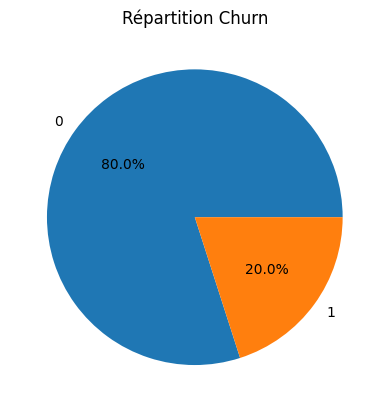

In [83]:
#Répartition de la variable churn -> variable cible

plt.pie(df["churn"].value_counts(), labels=df["churn"].unique(), autopct="%1.1f%%")

plt.title("Répartition Churn")
plt.show()


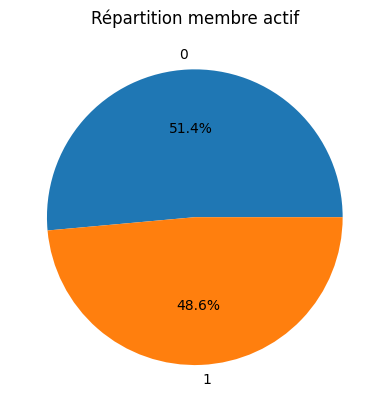

In [84]:
#Répartition de la variable active member

plt.pie(df["active_member"].value_counts(), labels=df["active_member"].unique(), autopct="%1.1f%%")

plt.title("Répartition membre actif")
plt.show()

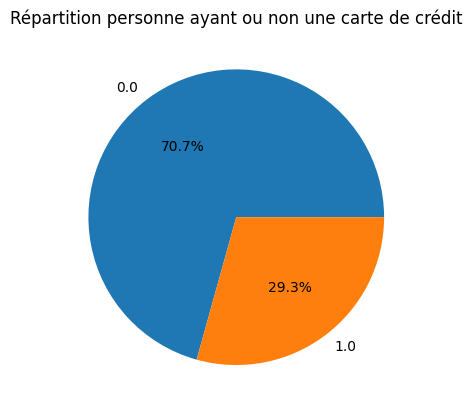

In [85]:
#Répartition de la variable credit_card
plt.pie(df["credit_card"].value_counts(), labels=df["credit_card"].unique(), autopct="%1.1f%%")

plt.title("Répartition personne ayant ou non une carte de crédit")
plt.show()

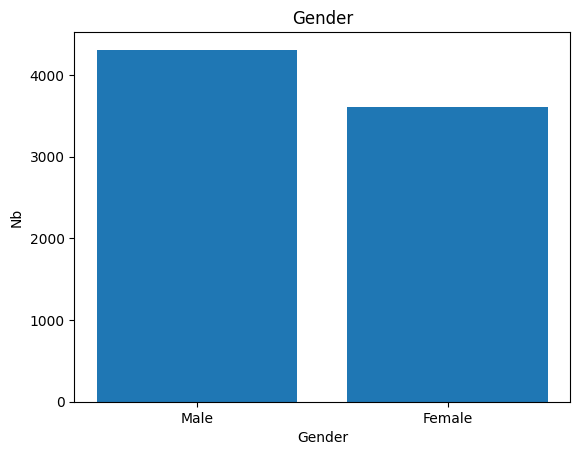

In [86]:
#Répartition de la variable gender
plt.bar(x=df["gender"].value_counts().index, height=df["gender"].value_counts())

plt.xlabel('Gender')
plt.ylabel('Nb')
plt.title('Gender')

plt.show()

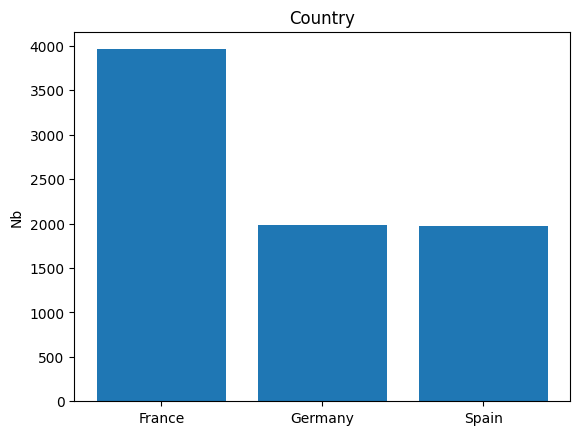

In [87]:
#Répartition de la variable country
plt.bar(x=df["country"].value_counts().index, height=df["country"].value_counts())

plt.ylabel('Nb')
plt.title('Country')

plt.show()

## **Analyse univariée**

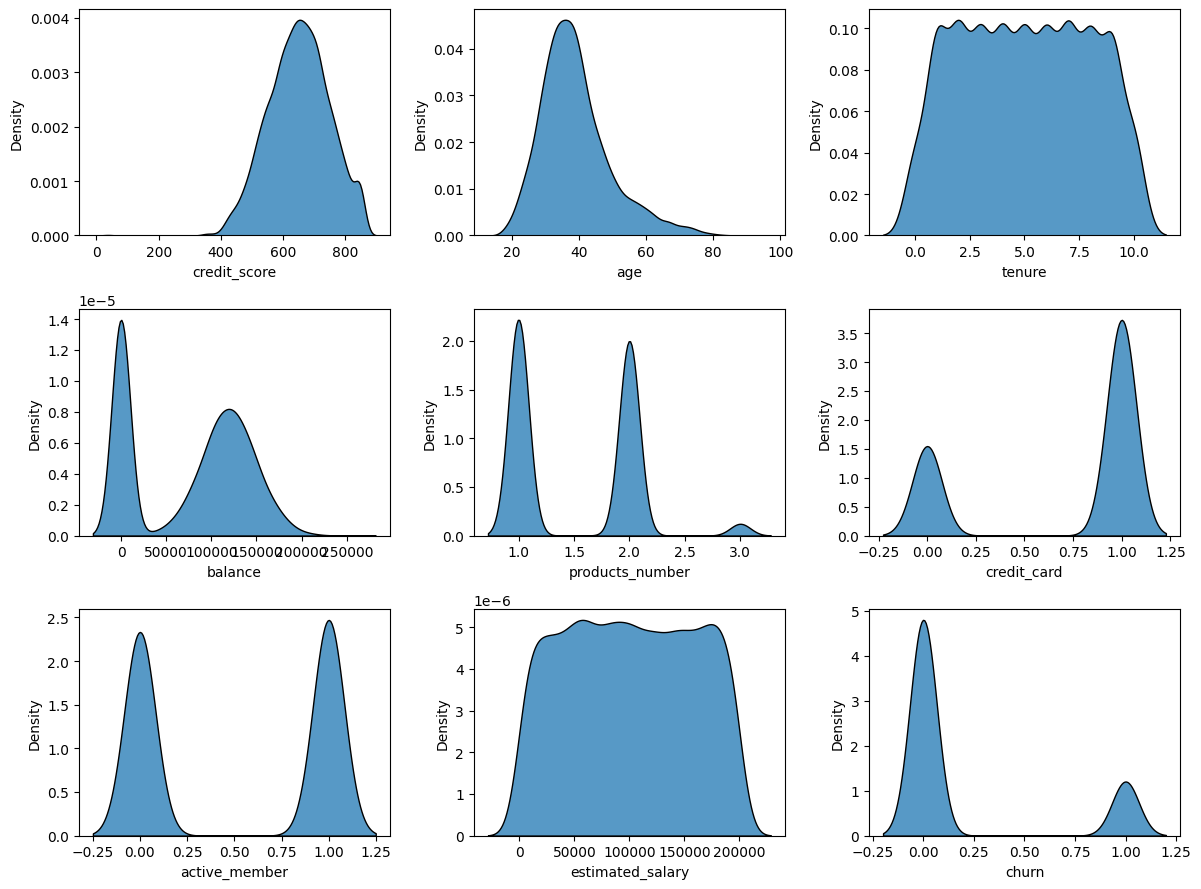

In [88]:
import seaborn as sns
#Les distributions
data_numerical = df.select_dtypes(include=["number"])
# Calculate the number of rows and columns needed based on the number of columns
n_cols = len(data_numerical.columns)
n_rows = (n_cols + 2) // 3  # Integer division with rounding up

# Create a figure and subplots for the calculated dimensions
fig, axes = plt.subplots(n_rows, 3, figsize=(12, n_rows * 3))  # Adjust figsize for better visualization

# Iterate through columns and create kdeplots
for i, col in enumerate(data_numerical.columns):
  r, c = divmod(i, 3)
  sns.kdeplot(data=data_numerical, x=col, multiple="stack", ax=axes[r, c])

# Handle any leftover axes (optional)
for i in range(len(data_numerical.columns), n_rows * 3):
  r, c = divmod(i, 3)
  axes[r, c].axis('off')  # Hide unused subplots

# Optional: Customize layout and display
plt.tight_layout()
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

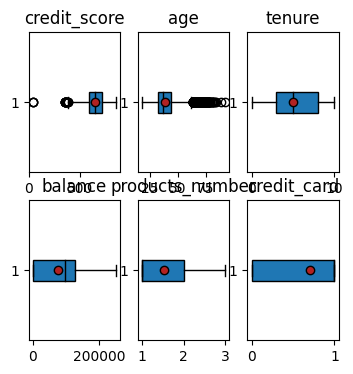

In [89]:
## Boxplots
medianprops = {"color": "black"}
meanprops = {"marker": "o", "markeredgecolor": "black", "markerfacecolor": "firebrick"}

data_numerical = df.select_dtypes(include=["number"])
# nb_row x nb_col >= data_numerical.shape[1]
nb_row = 2
nb_col = 3
fig, axes = plt.subplots(nb_row, nb_col, figsize=(4, 4))

for i, col in enumerate(data_numerical.columns):
    r, c = divmod(i, nb_col)
    axes[r, c].boxplot(
        data_numerical[col],
        showfliers=True,
        medianprops=medianprops,
        vert=False,
        patch_artist=True,
        showmeans=True,
        meanprops=meanprops,
    )
    axes[r, c].set_title(col)

## **Analyse bivariée**

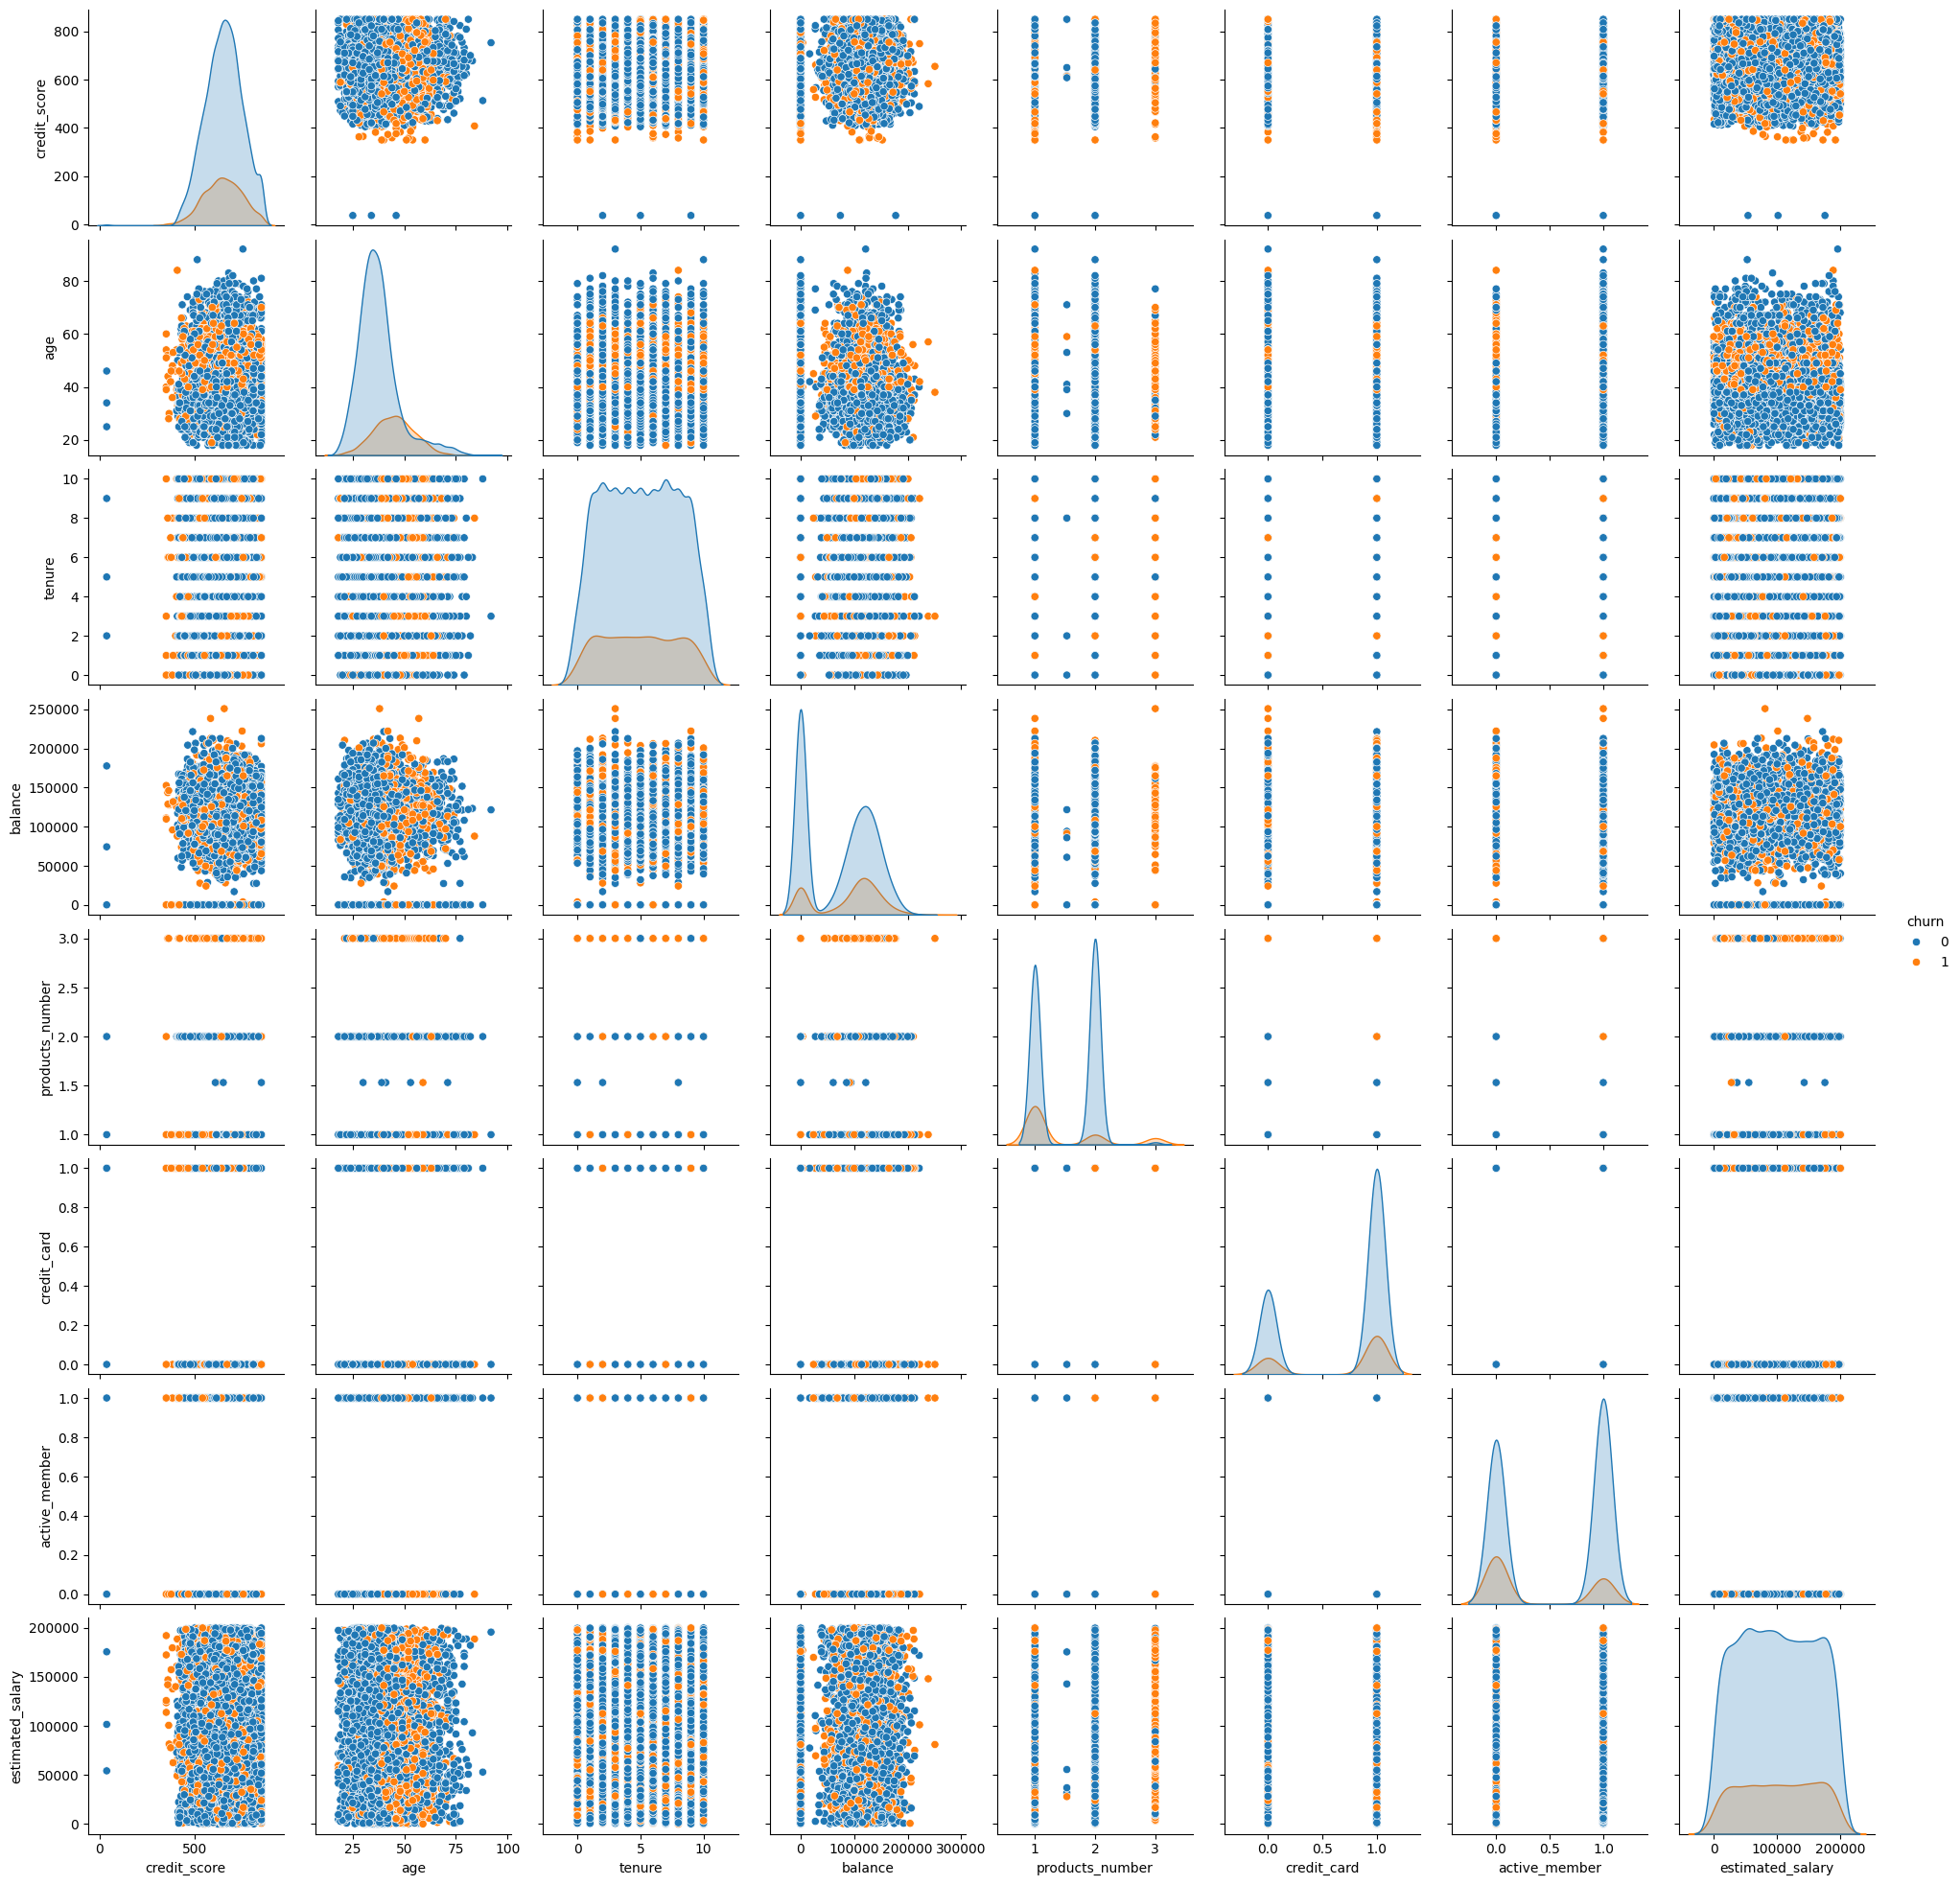

In [90]:
# Crée une matrice de graphiques de dispersion pour les variables numériques du df,
# en colorant les points en fonction de la variable 'churn'
sns.pairplot(df.select_dtypes(include=["number"]), hue="churn")

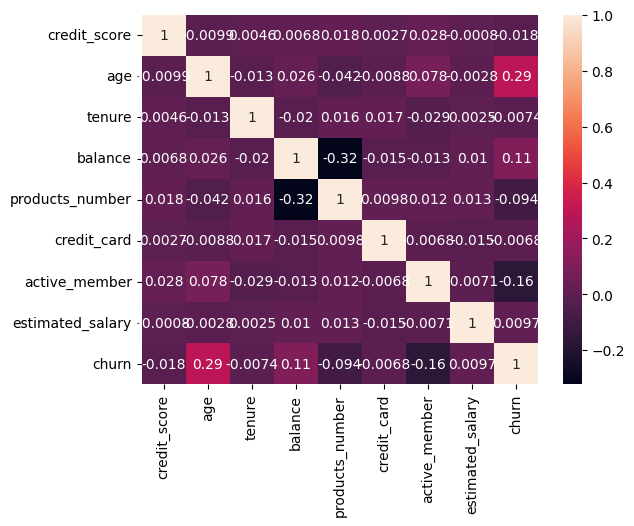

In [91]:
# Sélectionne les variables numériques
numeric=df.select_dtypes(include=["number"])

# Calcul de la matrice de corrélation entre les variables numériques
corr_matrix = numeric.corr()

#Affiche la matrice
sns.heatmap(corr_matrix, annot=True)
plt.show()

# **Hot encoding**

`L'encodage des données permet de rendre les données catégorielles utilisables pour les modèles d'apprentissage automatique et contribue à améliorer les performances des modèles.`

In [92]:
df.nunique()

customer_id         7917
credit_score         455
country                3
gender                 2
age                   69
tenure                11
balance             5038
products_number        4
credit_card            2
active_member          2
estimated_salary    7911
churn                  2
dtype: int64

In [93]:
# On va encoder les colonnes à 2 modalités et on fera le get dummies sur les variables ayant plus de 2 modalités
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
print("Classe de gender :", le.classes_)

df.head()

Classe de gender : ['Female' 'Male']


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15565701,698.0,Spain,0,39,9,161993.89,1.0,0.0,0,90212.38,0
1,15565706,612.0,Spain,1,35,1,0.00,1.0,1.0,1,83256.26,1
2,15565714,601.0,France,1,47,1,64430.06,2.0,0.0,1,96517.97,0
3,15565779,627.0,Germany,0,30,6,57809.32,1.0,1.0,0,188258.49,0
4,15565796,745.0,Germany,1,48,10,96048.55,1.0,1.0,0,74510.65,0




```
# le 0 correspond à Female et le 1 à Male
```



In [94]:
#get_dummies() crée une nouvelle colonne dans le df pour chaque modalité d'une variable
#Chaque observation est représentée par un 1 si elle appartient à cette catégorie, sinon 0.
#Cela crée une représentation binaire de chaque catégorie
df = pd.get_dummies(df, columns = ['country'], dtype='int64')
df

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,15565701,698.0,0,39,9,161993.89,1.0,0.0,0,90212.38,0,0,0,1
1,15565706,612.0,1,35,1,0.00,1.0,1.0,1,83256.26,1,0,0,1
2,15565714,601.0,1,47,1,64430.06,2.0,0.0,1,96517.97,0,1,0,0
3,15565779,627.0,0,30,6,57809.32,1.0,1.0,0,188258.49,0,0,1,0
4,15565796,745.0,1,48,10,96048.55,1.0,1.0,0,74510.65,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15815560,666.0,1,74,7,105102.50,1.0,1.0,1,46172.47,0,0,1,0
7996,15815626,640.0,1,63,2,68432.45,2.0,1.0,1,112503.24,1,1,0,0
7997,15815628,711.0,0,37,8,113899.92,1.0,0.0,0,80215.20,0,1,0,0
7998,15815656,541.0,0,39,9,100116.67,1.0,1.0,1,199808.10,1,0,1,0


# **Normalisation**

La normalisation des données permet de mettre toutes les variables sur une échelle commune, de stabiliser l'entraînement des modèles et d'améliorer les performances des algorithmes d'apprentissage automatique.

In [95]:
from sklearn.preprocessing import MinMaxScaler

#Normalise toutes les colonnes
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.loc[:,['credit_score','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary','country_France','country_Germany','country_Spain','churn']])
df_scaled = pd.DataFrame(df_scaled, columns=['credit_score','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary','country_France','country_Germany','country_Spain','churn'])

df_scaled

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,churn
0,0.813038,0.0,0.283784,0.9,0.645656,0.0,0.0,0.0,0.450881,0.0,0.0,1.0,0.0
1,0.707257,1.0,0.229730,0.1,0.000000,0.0,1.0,1.0,0.416079,0.0,0.0,1.0,1.0
2,0.693727,1.0,0.391892,0.1,0.256798,0.5,0.0,1.0,0.482427,1.0,0.0,0.0,0.0
3,0.725707,0.0,0.162162,0.6,0.230410,0.0,1.0,0.0,0.941404,0.0,1.0,0.0,0.0
4,0.870849,1.0,0.405405,1.0,0.382819,0.0,1.0,0.0,0.372325,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,0.773678,1.0,0.756757,0.7,0.418905,0.0,1.0,1.0,0.230550,0.0,1.0,0.0,0.0
7913,0.741697,1.0,0.608108,0.2,0.272750,0.5,1.0,1.0,0.562401,1.0,0.0,0.0,1.0
7914,0.829028,0.0,0.256757,0.8,0.453969,0.0,0.0,0.0,0.400865,1.0,0.0,0.0,0.0
7915,0.619926,0.0,0.283784,0.9,0.399033,0.0,1.0,1.0,0.999186,0.0,1.0,0.0,1.0


# Même traitement sur le fichier Test

Un fichier de test est crucial pour évaluer les performances d'un modèle d'apprentissage automatique sur des données indépendantes et pour prendre des décisions éclairées sur son efficacité, son généralisabilité et ses paramètres.

In [96]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_exam.csv', sep=';')
df_test.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15746662,568,Spain,Female,27,1,116320.68,1,0,1,45563.94
1,15707637,765,France,Female,56,1,0.00,1,1,0,13228.93
2,15746594,732,Spain,Male,33,8,0.00,1,1,0,119882.70
3,15582016,766,Spain,Male,41,6,99208.46,2,1,0,62402.38
4,15605339,673,France,Female,37,10,0.00,2,1,1,37411.35


In [97]:
# On va hotencoder cette colonne
le = LabelEncoder()
df_test['gender'] = le.fit_transform(df_test['gender'])
print("Classe de gender :", le.classes_)

df_test.head()

Classe de gender : ['Female' 'Male']


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15746662,568,Spain,0,27,1,116320.68,1,0,1,45563.94
1,15707637,765,France,0,56,1,0.00,1,1,0,13228.93
2,15746594,732,Spain,1,33,8,0.00,1,1,0,119882.70
3,15582016,766,Spain,1,41,6,99208.46,2,1,0,62402.38
4,15605339,673,France,0,37,10,0.00,2,1,1,37411.35


In [98]:
df_test = pd.get_dummies(df_test, columns = ['country'], dtype='int64')
df_test

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
0,15746662,568,0,27,1,116320.68,1,0,1,45563.94,0,0,1
1,15707637,765,0,56,1,0.00,1,1,0,13228.93,1,0,0
2,15746594,732,1,33,8,0.00,1,1,0,119882.70,0,0,1
3,15582016,766,1,41,6,99208.46,2,1,0,62402.38,0,0,1
4,15605339,673,0,37,10,0.00,2,1,1,37411.35,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,15768471,554,0,54,6,108755.00,1,1,0,40914.32,0,1,0
1996,15692106,606,0,25,3,147386.72,3,1,0,45482.04,0,0,1
1997,15721189,666,0,66,7,0.00,2,1,1,99792.82,1,0,0
1998,15578369,652,0,37,9,145219.30,1,1,0,159132.83,0,1,0


In [99]:
from sklearn.preprocessing import MinMaxScaler

#Normalise toutes les colonnes
scaler = MinMaxScaler()
df_test_scaled = scaler.fit_transform(df_test.loc[:,['credit_score','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary','country_France','country_Germany','country_Spain']])
df_test_scaled = pd.DataFrame(df_test_scaled, columns=['credit_score','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary','country_France','country_Germany','country_Spain'])

df_test_scaled

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
0,0.434870,0.0,0.121622,0.1,0.538248,0.000000,0.0,1.0,0.227784,0.0,0.0,1.0
1,0.829659,0.0,0.513514,0.1,0.000000,0.000000,1.0,0.0,0.066093,1.0,0.0,0.0
2,0.763527,1.0,0.202703,0.8,0.000000,0.000000,1.0,0.0,0.599413,0.0,0.0,1.0
3,0.831663,1.0,0.310811,0.6,0.459065,0.333333,1.0,0.0,0.311984,0.0,0.0,1.0
4,0.645291,0.0,0.256757,1.0,0.000000,0.333333,1.0,1.0,0.187017,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.406814,0.0,0.486486,0.6,0.503239,0.000000,1.0,0.0,0.204533,0.0,1.0,0.0
1996,0.511022,0.0,0.094595,0.3,0.681999,0.666667,1.0,0.0,0.227374,0.0,0.0,1.0
1997,0.631263,0.0,0.648649,0.7,0.000000,0.333333,1.0,1.0,0.498954,1.0,0.0,0.0
1998,0.603206,0.0,0.256757,0.9,0.671970,0.000000,1.0,0.0,0.795682,0.0,1.0,0.0


# **Export CSV**

In [ ]:
df_scaled.to_csv("df_scaled2.csv",index=False, sep=';')

In [ ]:
df_test_scaled.to_csv("df_test_scaled2.csv",index=False, sep=';')